- Colab link for this file :
https://colab.research.google.com/drive/1iA_zmz-A0h1qh5sNQM_DbuXTskUX010l#scrollTo=GOccxTa5bObk

## **importing dependencies**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## **Loading Data**

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- we got
  - 60000 images -> training
  - 10000 images -> testing
- image size : 28x28
- channel : 1 -> grayscale images

In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
X_train[0].shape

(28, 28)

5


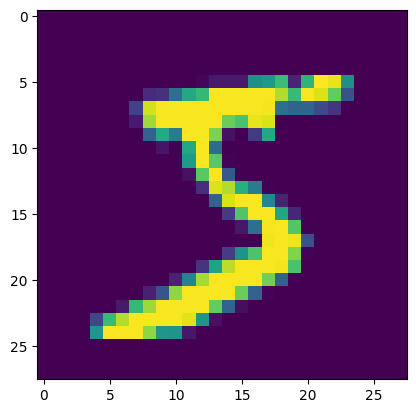

In [5]:
plt.imshow(X_train[0])
print(y_train[0])

## **Image Preprocessing**

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- Here we don't need to apply `one-hot encoding` , we can use these labels just as they are.
- also all images have same size, if not we needed to apply `resize()` method.

In [8]:
# applying scaling
X_train=X_train/255
X_test=X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## **Building Neural Network**

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3058 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1407 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0699 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
loss,accuracy=model.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9732
0.10283678025007248 0.9732000231742859


- **train data accuracy** : *0.9889*
- **test data accuracy** : *0.97320*

In [12]:
y_pred=model.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 1ms/step


array([6.32591248e-02, 1.23747531e-03, 2.67512556e-02, 9.44356501e-01,
       9.10928502e-05, 9.11551900e-03, 1.10418746e-07, 9.99996066e-01,
       8.72183383e-01, 3.25716138e-01], dtype=float32)

## **Converting Prediction Probalities to output labels.**

In [13]:
np.argmax(y_pred[0])

7

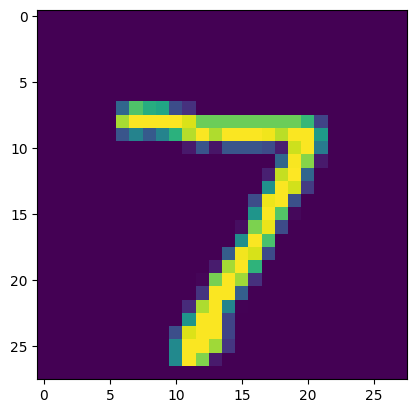

In [14]:
plt.imshow(X_test[0])

In [16]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

## **Confusion Matrix and Heatmap**

In [17]:
confusion_matrix(y_test,y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    1,   10,    5,    2,    2,    0],
       [   0, 1121,    1,    3,    0,    0,    2,    1,    7,    0],
       [   3,    2, 1001,    3,    4,    2,    2,    3,   11,    1],
       [   0,    0,    3,  986,    0,   10,    0,    4,    3,    4],
       [   0,    0,    3,    0,  959,    0,    5,    3,    1,   11],
       [   1,    0,    0,    6,    1,  872,    5,    0,    6,    1],
       [   4,    1,    1,    1,    7,    5,  932,    0,    7,    0],
       [   0,    2,    8,    3,    3,    1,    0,  997,   11,    3],
       [   1,    0,    2,    7,    6,   11,    0,    3,  944,    0],
       [   5,    2,    0,   10,   13,    6,    0,    6,    6,  961]],
      dtype=int32)>

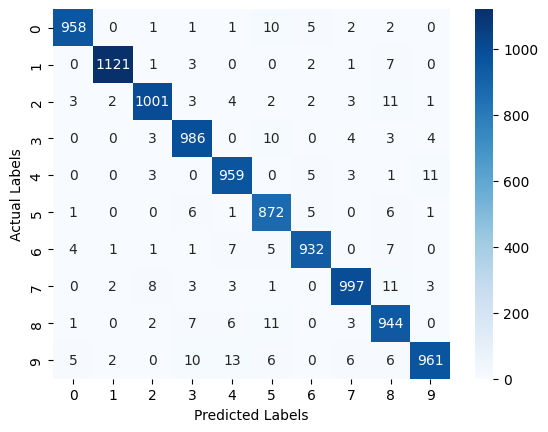

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred_labels),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

## **Building a predictive system**

In [20]:
!wget 'https://edwin-de-jong.github.io/blog/mnist-sequence-data/fig/5.png'

--2024-05-05 19:51:33--  https://edwin-de-jong.github.io/blog/mnist-sequence-data/fig/5.png
Resolving edwin-de-jong.github.io (edwin-de-jong.github.io)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to edwin-de-jong.github.io (edwin-de-jong.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11393 (11K) [image/png]
Saving to: ‘5.png’

5.png               100%[===================>]  11.13K  --.-KB/s    in 0s      

2024-05-05 19:51:33 (88.1 MB/s) - ‘5.png’ saved [11393/11393]



In [31]:
from PIL import Image
inp_img=Image.open('/content/test_image_5.png')
inp_img_resized=inp_img.resize((28,28))
inp_img_resized

In [35]:
import matplotlib.image as mpimg

inp_img_resized.save('test_image_5_resized.png')
resized_img_loaded=mpimg.imread('/content/test_image_5_resized.png')
resized_img_loaded.shape

(28, 28, 3)

### **RGB to Grayscale**

In [36]:
gray_img=cv2.cvtColor(resized_img_loaded,cv2.COLOR_RGB2GRAY)
gray_img.shape

(28, 28)

In [37]:
gray_img

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [38]:
gray_img=gray_img/255
gray_img

array([[0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.0039

In [40]:
result=model.predict(gray_img.reshape(1,28,28))
result

1/1 [==============================] - 0s 21ms/step


array([[0.2514733 , 0.332842  , 0.50494313, 0.30381346, 0.5069807 ,
        0.6603294 , 0.4351561 , 0.44693285, 0.41772187, 0.31460756]],
      dtype=float32)

In [42]:
np.argmax(result[0])

5

In [45]:
img_path=input('Enter the path of image : ')
input_img=Image.open(img_path)

inp_img_resized=input_img.resize((28,28))
inp_img_resized.save('test_image_resized.png')
resized_img_loaded=mpimg.imread('/content/test_image_resized.png')
gray_img=cv2.cvtColor(resized_img_loaded,cv2.COLOR_RGB2GRAY)
gray_img=gray_img/255
result=model.predict(gray_img.reshape(1,28,28))
np.argmax(result[0])

Enter the path of image : /content/test_image_5.png
1/1 [==============================] - 0s 25ms/step


5

Enter the path of image: /content/test_image_5.png
1/1 [==============================] - 0s 19ms/step


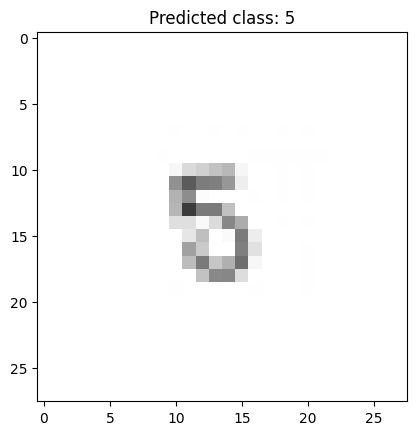

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Get the image path from the user
img_path = input('Enter the path of image: ')

# Open the image
input_img = Image.open(img_path)

# Resize the image
inp_img_resized = input_img.resize((28, 28))
inp_img_resized.save('test_image_resized.png')

# Load the resized image using matplotlib
resized_img_loaded = mpimg.imread('/content/test_image_resized.png')

# Convert the image to grayscale
gray_img = cv2.cvtColor(resized_img_loaded, cv2.COLOR_RGB2GRAY)
gray_img = gray_img / 255

# Predict the result using the model
result = model.predict(gray_img.reshape(1, 28, 28))
predicted_class = np.argmax(result[0])

# Display the resized image
plt.imshow(resized_img_loaded, cmap='gray')
plt.title(f'Predicted class: {predicted_class}')
plt.show()